In [247]:
import numpy as np
import random
import statistics
import matplotlib.pyplot as plt

In [248]:
probRECOMBINACAO = 0.9
probMUTACAO = 0.4
mu = 100 # Tamanho da população

In [249]:
# Função de Fitness

def fitness (vetorRainhas):
  global numFitness
  numFitness += 1
  numColisao = 0 # Inicialmente vetor colisao zerado

  for j in range(8):
    for k in range(j+1, 8):
      if abs(j - k) == abs(vetorRainhas[j] - vetorRainhas[k]):
        numColisao += 1

  return numColisao

In [250]:
# Criando uma função para gerar uma população de possíveis soluções

def gerar_populacao():
  new_population = [np.random.permutation(np.arange(1, 9)) for _ in range(mu)] # Inicializando mu indivíduos formados por permutações aleatórias de 1 a 8

  # Associando cada indivíduo ao seu fitness
  population = [(individuo, fitness(individuo)) for individuo in new_population]

  return population

In [251]:
# Função auxiliar recombinação

def rec(cut, pai1, pai2):
  filho = np.full(8, 0) # Cria um filho de tamanho 8 preenchido com 0

  # Preenche o filho com os valores do primeiro pai até o ponto de corte
  for i in range(0, cut + 1):
        filho[i] = pai1[i]
  index = cut + 1 # Define um index para preencher os elementos restantes do vetor filho
  j = cut # j representa o índex do pai que será percorrido como um vetor circular

  while index < 8: # Quando index > 7 significa que todos os elementos do filho foram preenchidos
    j = (j + 1) % 8
    elemento = pai2[j]
    if(elemento not in filho): # Copia para o filho apenas os elementos do pai 2 que não estão presentes no pai 1 (evita duplicação de genes)
      filho[index] = elemento
      index += 1

  return filho

In [252]:
# Função de Recombinação

def recombinacao(pai1, pai2):

  # Extrai os vetores de características da tupla pai
  p1 = pai1[0]
  p2 = pai2[0]

  cut = random.randint(0, 7) # Representa o ponto de corte

  # Recombinando os pais para gerar dois filhos
  filho1 = rec(cut, p1, p2)
  filho2 = rec(cut, p2, p1)

  # Calculando o fitness dos filhos
  fitness1 = fitness(filho1)
  fitness2 = fitness(filho2)

  return((filho1, fitness1), (filho2, fitness2))

In [253]:
# Função para selecionar os pais

def selecionaPais(population):

    # Seleciona 5 indivíduos aleatórios (sem repetição)
    selecionados = random.sample(population, 5)

    # Ordena os 5 pelo fitness em ordem crescente (quanto menor o fitness, melhor o indivíduo)
    selecionados.sort(key=lambda individuo: individuo[1])

    # Retorna os dois melhores
    return selecionados[0], selecionados[1]

In [254]:
# Função para permutar dois elementos

def mutacao(individuo):

    vetor = individuo[0]

    # Escolhe duas posições distintas aleatórias
    i, j = random.sample(range(8), 2)

    # Permuta os elementos nas posições i e j
    vetor[i], vetor[j] = vetor[j], vetor[i]

    return (vetor, fitness(vetor))

In [255]:
# Função para gerar os filhoss

def gerarFilhos(probMUTACAO, probRECOMBINACAO, population):

  #Seleciona dois pais
  pai1, pai2 = selecionaPais(population)

  # 90% das vezes haverá recombinação, já em 10% os filhos serão cópias diretas dos pais
  if(random.random() < probRECOMBINACAO):
    filho1, filho2 = recombinacao(pai1, pai2)
  else:
    filho1, filho2 = pai1, pai2

  # 40% das vezes haverá mutação
  if(random.random() < probMUTACAO):
    filho1 = (mutacao(filho1))
  if(random.random() < probMUTACAO):
    filho2 = (mutacao(filho2))

  return filho1, filho2

In [256]:
# Funçao para selecionar os sobreviventes

def sobreviventes(populacao, filhos):
    # Ordena a população por fitness (do pior para o melhor)
    populacao.sort(key=lambda individuo: individuo[1], reverse=True)

    for filho in filhos:
        # Só substitui se o filho for melhor que o pior atual
        if filho[1] < populacao[0][1]:
            populacao[0] = filho  # Substitui o pior
            populacao.sort(key=lambda x: x[1], reverse=True)  # Reordena

In [257]:
def plot_fitness(avgFitness, melhorFitness):
    plt.figure(figsize=(10, 5))
    plt.plot(avgFitness, label='Fitness Médio', marker='o', color= 'magenta')
    plt.plot(melhorFitness, label='Melhor Fitness', marker='s', color = 'purple')
    plt.title("Evolução do Fitness por Geração")
    plt.xlabel("Geração")
    plt.ylabel("Fitness")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [258]:
# Loop
def loop():

  global numFitness
  numFitness = 0 # Reseta a avaliação de fitness

  #Gerando uma população para o algoritmo
  population = gerar_populacao()
  geracao = 0 # Geração atual
  avgFitness = [] # guarda a evolução do fitness ao longo das gerações
  melhorFitness = []

  # Inicializando as gerações
  while True:
    geracao += 1

    # Gerando dois filhos por geração
    filho1, filho2 = gerarFilhos(probMUTACAO, probRECOMBINACAO, population)
    sobreviventes(population, [filho1, filho2])

    # Guarda a média do fitness da população em um vetor
    fit_values = [fit for (_, fit) in population]
    avgFitness.append(float(np.mean(fit_values)))
    melhorFitness.append(min(fit_values))

    #Confere se a solucao foi encontrada
    individuo = next((ind for ind in population if ind[1] == 0), None)
    if individuo is not None:
      print(f"\n✅ Solução encontrada na geração {geracao}")
      print(f"Solução: {individuo[0]}")
      print(f"Fitness: {individuo[1]}")
      print(avgFitness)
      plot_fitness(avgFitness, melhorFitness)
      break

    if (numFitness >= 1e10 + mu): # mu Ignora a avaliação de Fitness realizada durante a inicialização da população
      print(f"\n❌ Limite de {numFitness} avaliações de fitness atingido. Encerrando.")
      break

  return geracao

In [259]:
# Criando uma sequência de simulações para avaliar a consistência do algoritmo

def simulacoes(numSimulacoes):

  resultados = np.full(numSimulacoes, 0) # Armazena o número de gerações executadas até encontrar a solução

  # Executa as simulações
  for i in range(numSimulacoes):
    resultados[i] = loop()

  # Calculando dados estatísticos sobre a execução do algoritmo
  media = np.mean(resultados)
  mediana = np.median(resultados)
  moda = statistics.mode(resultados)  # Pode lançar erro se não houver moda
  desvio_padrao = np.std(resultados, ddof=1)
  variancia = np.var(resultados, ddof=1)
  amplitude = max(resultados) - min(resultados)
  minimo = min(resultados)
  maximo = max(resultados)
  q1 = np.percentile(resultados, 25)
  q3 = np.percentile(resultados, 75)
  coef_var = desvio_padrao / media

  print(f"\nMédia: {media}")
  print(f"Mediana: {mediana}")
  print(f"Moda: {moda}")
  print(f"Desvio padrão: {desvio_padrao}")
  print(f"Variância: {variancia}")
  print(f"Amplitude: {amplitude}")
  print(f"Valor mínimo: {minimo}")
  print(f"Valor máximo: {maximo}")
  print(f"Q1: {q1}, Q3: {q3}")
  print(f"Coeficiente de variação: {coef_var}")


✅ Solução encontrada na geração 1
Solução: [7 3 1 6 8 5 2 4]
Fitness: 0
[4.81]


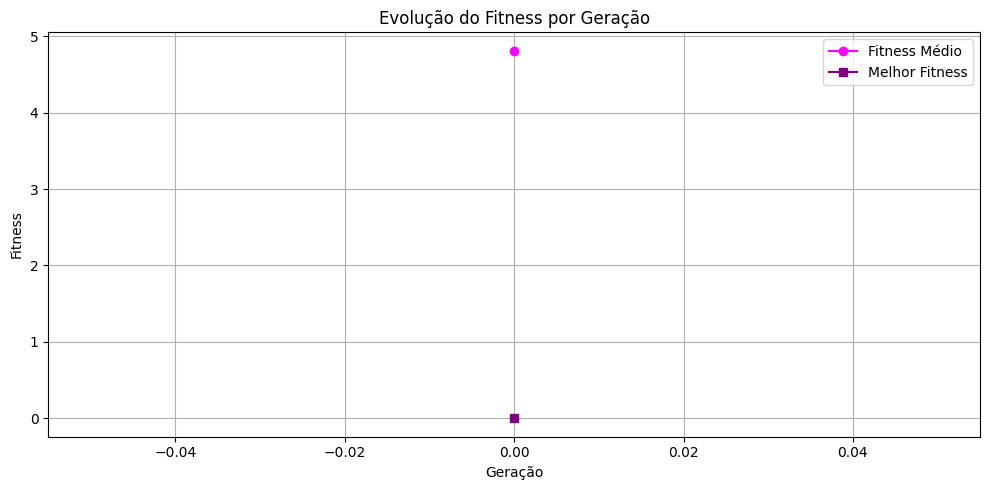


✅ Solução encontrada na geração 33
Solução: [3 6 8 1 4 7 5 2]
Fitness: 0
[4.8, 4.67, 4.57, 4.46, 4.42, 4.36, 4.26, 4.19, 4.13, 4.08, 4.0, 3.93, 3.82, 3.77, 3.76, 3.69, 3.62, 3.6, 3.56, 3.5, 3.46, 3.39, 3.34, 3.33, 3.31, 3.26, 3.22, 3.2, 3.15, 3.09, 3.08, 3.01, 2.96]


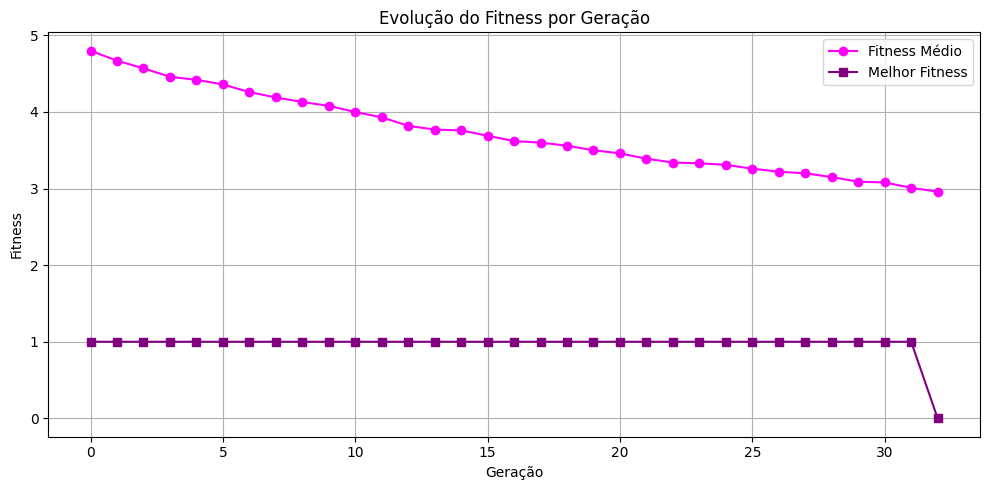


✅ Solução encontrada na geração 1
Solução: [4 8 1 5 7 2 6 3]
Fitness: 0
[4.94]


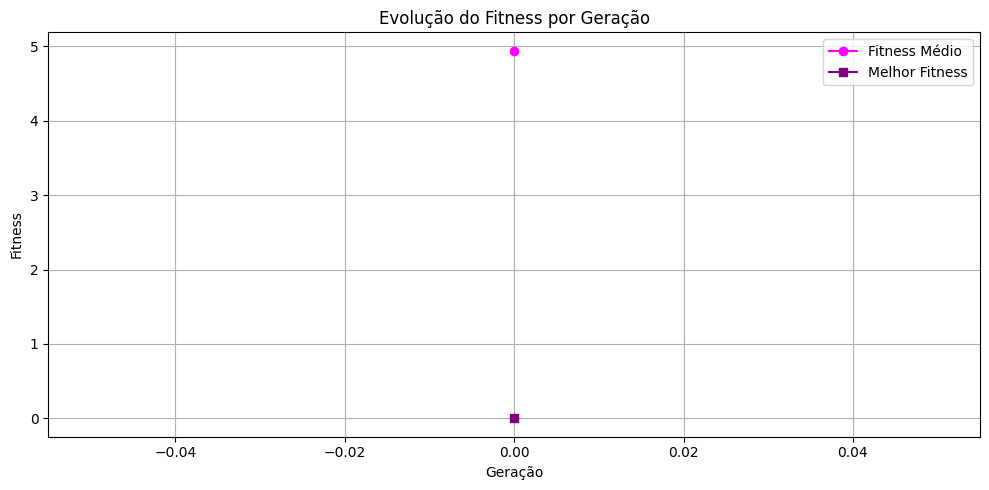


✅ Solução encontrada na geração 94
Solução: [6 1 5 2 8 3 7 4]
Fitness: 0
[4.82, 4.7, 4.58, 4.48, 4.43, 4.34, 4.27, 4.19, 4.15, 4.05, 3.98, 3.93, 3.88, 3.84, 3.8, 3.75, 3.69, 3.64, 3.6, 3.57, 3.53, 3.48, 3.45, 3.42, 3.4, 3.34, 3.28, 3.27, 3.22, 3.18, 3.15, 3.13, 3.11, 3.1, 3.1, 3.07, 3.04, 3.02, 3.02, 3.01, 2.99, 2.99, 2.98, 2.97, 2.95, 2.94, 2.92, 2.9, 2.89, 2.88, 2.84, 2.8, 2.77, 2.75, 2.72, 2.69, 2.67, 2.65, 2.62, 2.6, 2.6, 2.6, 2.58, 2.58, 2.58, 2.57, 2.57, 2.55, 2.54, 2.54, 2.54, 2.51, 2.5, 2.49, 2.49, 2.48, 2.45, 2.45, 2.42, 2.4, 2.4, 2.4, 2.39, 2.38, 2.35, 2.33, 2.31, 2.3, 2.28, 2.28, 2.28, 2.26, 2.25, 2.22]


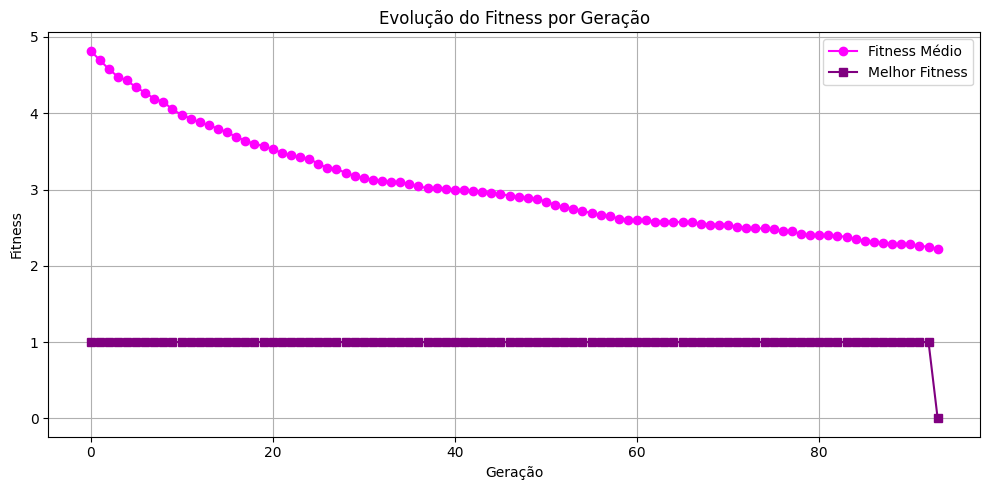


✅ Solução encontrada na geração 1
Solução: [6 2 7 1 3 5 8 4]
Fitness: 0
[5.09]


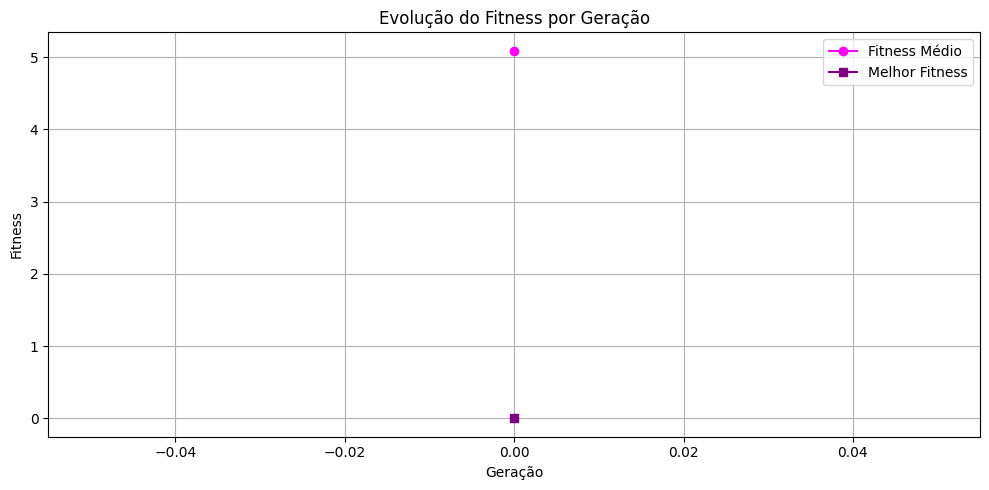


✅ Solução encontrada na geração 93
Solução: [6 3 5 7 1 4 2 8]
Fitness: 0
[4.87, 4.76, 4.67, 4.58, 4.57, 4.48, 4.39, 4.33, 4.25, 4.24, 4.21, 4.14, 4.08, 4.04, 4.01, 3.95, 3.94, 3.88, 3.82, 3.78, 3.73, 3.69, 3.63, 3.63, 3.6, 3.58, 3.55, 3.51, 3.5, 3.5, 3.46, 3.39, 3.35, 3.33, 3.31, 3.31, 3.29, 3.25, 3.21, 3.15, 3.11, 3.07, 3.04, 3.03, 3.01, 2.98, 2.96, 2.95, 2.93, 2.92, 2.92, 2.92, 2.88, 2.88, 2.86, 2.83, 2.83, 2.82, 2.79, 2.77, 2.75, 2.75, 2.69, 2.66, 2.64, 2.62, 2.58, 2.57, 2.52, 2.51, 2.51, 2.49, 2.49, 2.49, 2.49, 2.49, 2.48, 2.47, 2.47, 2.47, 2.46, 2.45, 2.43, 2.42, 2.41, 2.39, 2.39, 2.35, 2.35, 2.35, 2.35, 2.31, 2.28]


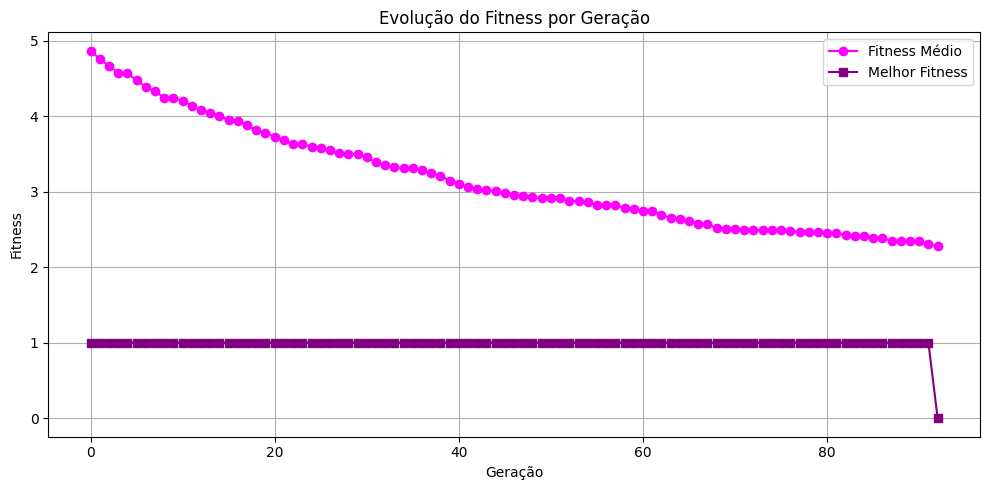


✅ Solução encontrada na geração 116
Solução: [4 2 8 6 1 3 5 7]
Fitness: 0
[5.04, 4.89, 4.81, 4.71, 4.6, 4.5, 4.45, 4.39, 4.31, 4.25, 4.18, 4.1, 4.0, 3.96, 3.92, 3.89, 3.83, 3.78, 3.73, 3.69, 3.67, 3.61, 3.55, 3.48, 3.45, 3.44, 3.43, 3.4, 3.37, 3.32, 3.26, 3.21, 3.15, 3.14, 3.13, 3.12, 3.08, 3.08, 3.02, 2.99, 2.96, 2.93, 2.93, 2.92, 2.91, 2.88, 2.86, 2.86, 2.83, 2.8, 2.79, 2.78, 2.76, 2.72, 2.72, 2.72, 2.71, 2.68, 2.66, 2.66, 2.62, 2.6, 2.56, 2.54, 2.51, 2.47, 2.45, 2.45, 2.44, 2.44, 2.44, 2.43, 2.43, 2.43, 2.41, 2.41, 2.41, 2.41, 2.39, 2.39, 2.37, 2.36, 2.33, 2.32, 2.32, 2.31, 2.31, 2.31, 2.3, 2.3, 2.3, 2.29, 2.29, 2.29, 2.27, 2.27, 2.25, 2.23, 2.23, 2.23, 2.22, 2.18, 2.17, 2.14, 2.14, 2.14, 2.1, 2.09, 2.08, 2.06, 2.06, 2.05, 2.04, 2.03, 2.03, 1.99]


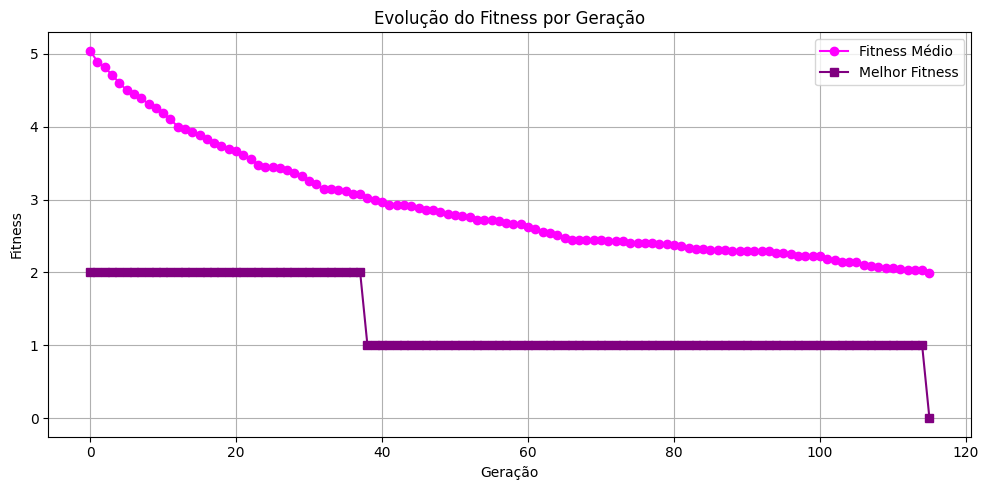


✅ Solução encontrada na geração 50
Solução: [7 1 3 8 6 4 2 5]
Fitness: 0
[5.24, 5.14, 5.01, 4.95, 4.88, 4.81, 4.73, 4.67, 4.56, 4.47, 4.39, 4.32, 4.3, 4.24, 4.2, 4.16, 4.12, 4.08, 4.03, 3.98, 3.94, 3.89, 3.86, 3.84, 3.77, 3.73, 3.68, 3.65, 3.65, 3.6, 3.55, 3.55, 3.5, 3.47, 3.47, 3.46, 3.46, 3.44, 3.4, 3.37, 3.33, 3.29, 3.26, 3.25, 3.22, 3.14, 3.1, 3.1, 3.1, 3.06]


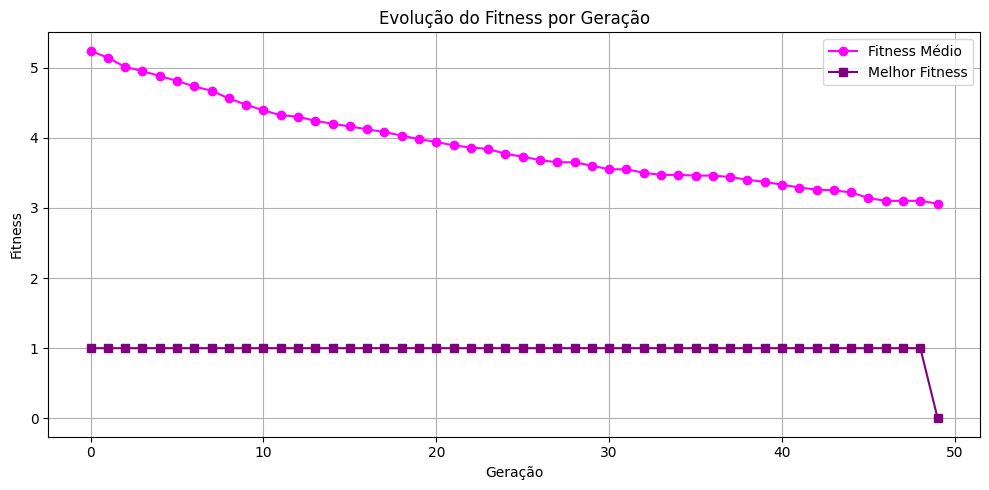


✅ Solução encontrada na geração 27
Solução: [3 5 2 8 6 4 7 1]
Fitness: 0
[5.02, 4.91, 4.79, 4.68, 4.62, 4.54, 4.45, 4.4, 4.35, 4.27, 4.24, 4.12, 4.04, 3.99, 3.93, 3.87, 3.85, 3.79, 3.75, 3.68, 3.61, 3.58, 3.53, 3.49, 3.47, 3.43, 3.37]


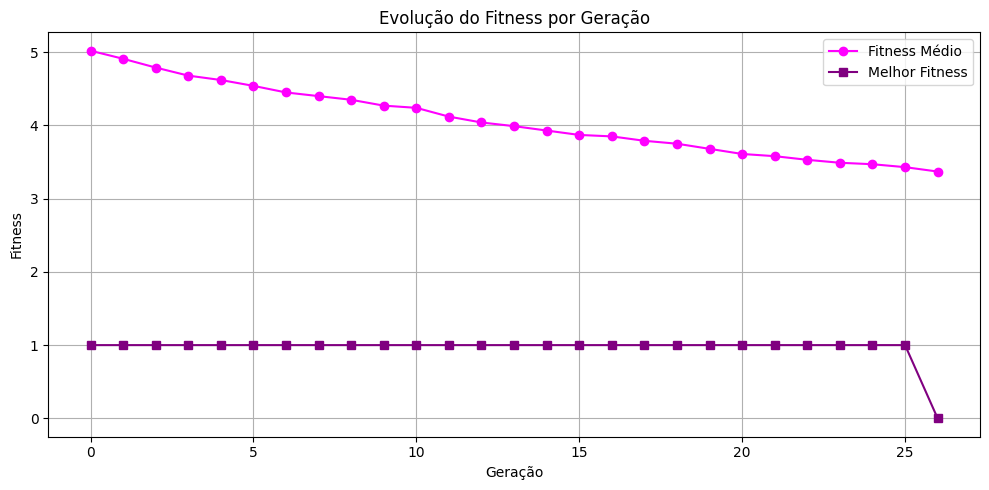


✅ Solução encontrada na geração 1
Solução: [5 3 8 4 7 1 6 2]
Fitness: 0
[4.53]


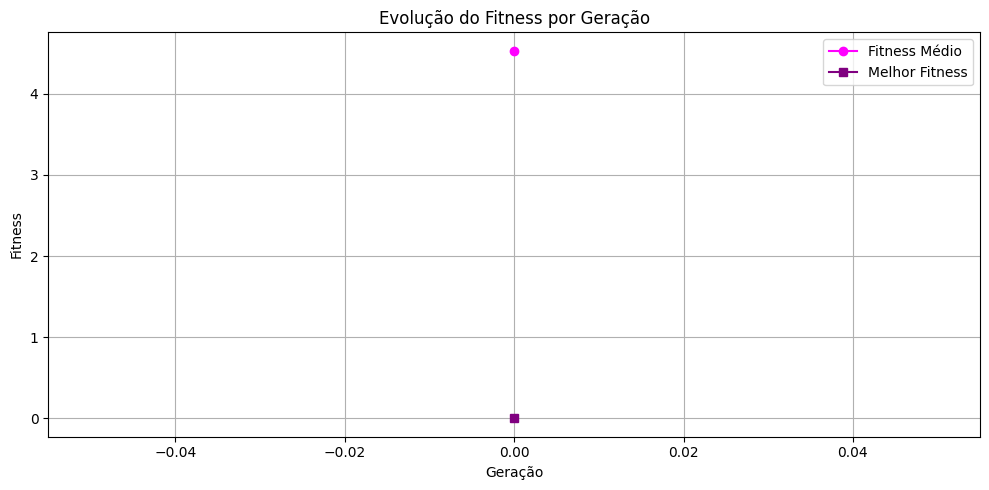


✅ Solução encontrada na geração 114
Solução: [3 1 7 5 8 2 4 6]
Fitness: 0
[5.21, 5.11, 5.03, 4.95, 4.85, 4.79, 4.69, 4.61, 4.58, 4.52, 4.45, 4.41, 4.34, 4.28, 4.19, 4.09, 4.05, 4.0, 3.96, 3.9, 3.82, 3.81, 3.78, 3.74, 3.71, 3.63, 3.57, 3.57, 3.54, 3.53, 3.47, 3.46, 3.44, 3.41, 3.38, 3.31, 3.29, 3.28, 3.27, 3.21, 3.16, 3.13, 3.12, 3.07, 3.04, 3.0, 2.96, 2.95, 2.95, 2.94, 2.94, 2.93, 2.89, 2.88, 2.84, 2.84, 2.8, 2.76, 2.75, 2.73, 2.68, 2.64, 2.58, 2.56, 2.55, 2.54, 2.5, 2.49, 2.44, 2.38, 2.33, 2.3, 2.29, 2.25, 2.22, 2.18, 2.16, 2.14, 2.12, 2.11, 2.08, 2.04, 2.02, 2.02, 2.02, 1.99, 1.97, 1.93, 1.89, 1.86, 1.86, 1.82, 1.8, 1.8, 1.8, 1.76, 1.74, 1.7, 1.68, 1.68, 1.66, 1.64, 1.62, 1.58, 1.56, 1.54, 1.5, 1.46, 1.46, 1.44, 1.41, 1.4, 1.39, 1.36]


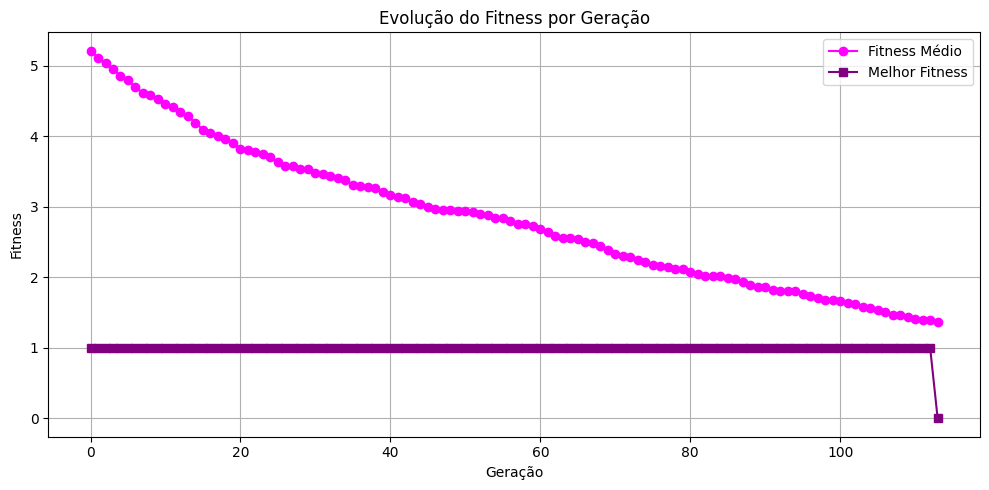


✅ Solução encontrada na geração 55
Solução: [6 4 2 8 5 7 1 3]
Fitness: 0
[5.0, 4.84, 4.74, 4.66, 4.56, 4.5, 4.48, 4.4, 4.38, 4.34, 4.26, 4.2, 4.13, 4.07, 4.03, 4.01, 3.97, 3.91, 3.85, 3.81, 3.76, 3.76, 3.73, 3.68, 3.63, 3.61, 3.59, 3.59, 3.55, 3.5, 3.48, 3.45, 3.45, 3.44, 3.41, 3.39, 3.38, 3.34, 3.29, 3.28, 3.22, 3.19, 3.16, 3.14, 3.13, 3.1, 3.08, 3.07, 3.05, 3.03, 3.0, 3.0, 2.98, 2.98, 2.92]


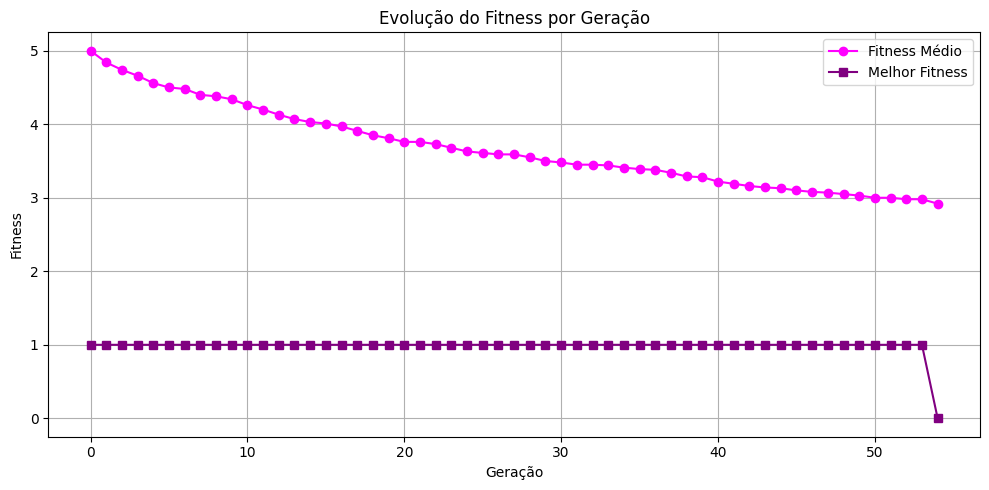


✅ Solução encontrada na geração 146
Solução: [6 3 7 2 4 8 1 5]
Fitness: 0
[5.09, 4.96, 4.81, 4.68, 4.59, 4.55, 4.48, 4.42, 4.36, 4.27, 4.21, 4.14, 4.11, 4.05, 4.01, 3.97, 3.91, 3.89, 3.89, 3.85, 3.79, 3.75, 3.68, 3.66, 3.66, 3.66, 3.63, 3.61, 3.56, 3.52, 3.49, 3.49, 3.44, 3.41, 3.39, 3.37, 3.37, 3.31, 3.29, 3.25, 3.2, 3.16, 3.16, 3.12, 3.1, 3.06, 3.02, 3.01, 2.95, 2.94, 2.94, 2.92, 2.88, 2.88, 2.84, 2.84, 2.83, 2.79, 2.77, 2.72, 2.69, 2.69, 2.69, 2.67, 2.67, 2.65, 2.65, 2.64, 2.61, 2.6, 2.6, 2.57, 2.55, 2.55, 2.54, 2.52, 2.48, 2.46, 2.43, 2.42, 2.41, 2.4, 2.4, 2.38, 2.37, 2.36, 2.36, 2.36, 2.36, 2.36, 2.35, 2.34, 2.32, 2.31, 2.31, 2.3, 2.3, 2.3, 2.26, 2.26, 2.24, 2.22, 2.22, 2.22, 2.21, 2.21, 2.21, 2.18, 2.16, 2.14, 2.14, 2.13, 2.13, 2.11, 2.11, 2.09, 2.08, 2.08, 2.05, 2.03, 2.03, 1.99, 1.97, 1.97, 1.95, 1.94, 1.9, 1.88, 1.87, 1.87, 1.87, 1.87, 1.85, 1.81, 1.79, 1.78, 1.78, 1.77, 1.77, 1.75, 1.75, 1.75, 1.75, 1.73, 1.72, 1.68]


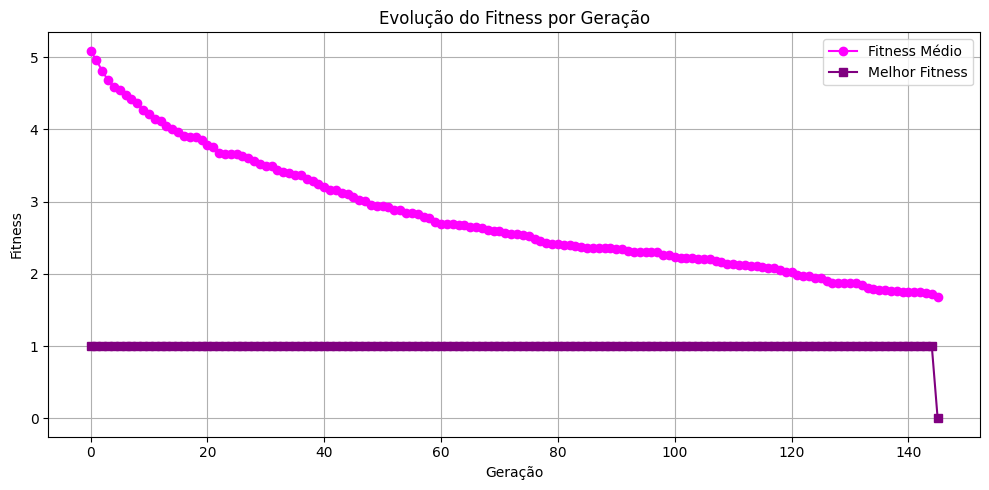


✅ Solução encontrada na geração 196
Solução: [6 4 7 1 8 2 5 3]
Fitness: 0
[4.62, 4.49, 4.39, 4.33, 4.26, 4.22, 4.17, 4.08, 3.99, 3.94, 3.92, 3.85, 3.83, 3.81, 3.77, 3.75, 3.73, 3.67, 3.62, 3.57, 3.54, 3.51, 3.48, 3.44, 3.41, 3.37, 3.34, 3.3, 3.28, 3.25, 3.21, 3.2, 3.16, 3.12, 3.12, 3.08, 3.06, 3.03, 3.02, 3.0, 2.99, 2.99, 2.98, 2.98, 2.98, 2.93, 2.91, 2.9, 2.89, 2.86, 2.83, 2.8, 2.78, 2.77, 2.76, 2.74, 2.72, 2.72, 2.7, 2.68, 2.65, 2.62, 2.61, 2.61, 2.61, 2.6, 2.6, 2.6, 2.59, 2.57, 2.56, 2.56, 2.55, 2.54, 2.53, 2.53, 2.52, 2.5, 2.48, 2.47, 2.47, 2.45, 2.44, 2.44, 2.44, 2.43, 2.43, 2.42, 2.42, 2.42, 2.41, 2.4, 2.37, 2.36, 2.35, 2.34, 2.31, 2.29, 2.29, 2.28, 2.28, 2.28, 2.28, 2.28, 2.25, 2.24, 2.23, 2.23, 2.22, 2.22, 2.2, 2.18, 2.18, 2.16, 2.15, 2.15, 2.15, 2.13, 2.11, 2.11, 2.1, 2.1, 2.08, 2.07, 2.07, 2.07, 2.07, 2.07, 2.05, 2.03, 2.03, 2.03, 2.02, 2.02, 2.02, 2.0, 1.98, 1.98, 1.98, 1.95, 1.94, 1.94, 1.94, 1.94, 1.94, 1.92, 1.89, 1.89, 1.89, 1.89, 1.89, 1.89, 1.87, 1.85, 1.84, 1.84, 1.8

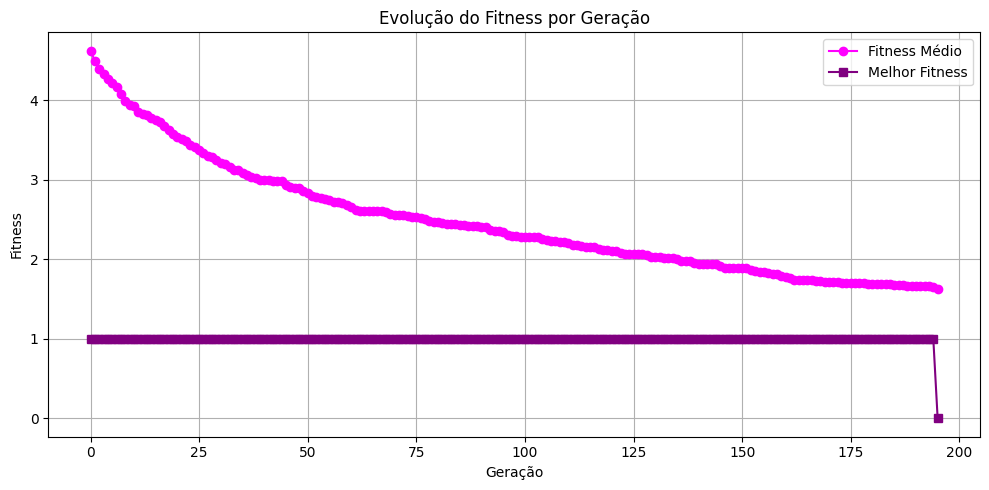


✅ Solução encontrada na geração 1809
Solução: [3 1 7 5 8 2 4 6]
Fitness: 0
[4.6, 4.47, 4.35, 4.25, 4.16, 4.09, 4.02, 3.96, 3.92, 3.83, 3.78, 3.76, 3.74, 3.67, 3.6, 3.56, 3.52, 3.52, 3.49, 3.45, 3.39, 3.36, 3.36, 3.33, 3.32, 3.29, 3.28, 3.24, 3.2, 3.17, 3.14, 3.11, 3.08, 3.08, 3.07, 3.05, 3.02, 3.02, 2.99, 2.99, 2.99, 2.99, 2.98, 2.94, 2.92, 2.91, 2.88, 2.87, 2.85, 2.84, 2.83, 2.82, 2.82, 2.8, 2.79, 2.76, 2.75, 2.75, 2.73, 2.71, 2.71, 2.71, 2.71, 2.71, 2.71, 2.69, 2.68, 2.67, 2.66, 2.66, 2.64, 2.64, 2.64, 2.64, 2.64, 2.63, 2.63, 2.63, 2.63, 2.63, 2.63, 2.63, 2.63, 2.63, 2.62, 2.61, 2.59, 2.59, 2.59, 2.59, 2.57, 2.57, 2.54, 2.54, 2.54, 2.5, 2.49, 2.47, 2.46, 2.45, 2.44, 2.44, 2.43, 2.42, 2.42, 2.41, 2.41, 2.41, 2.41, 2.4, 2.4, 2.4, 2.39, 2.39, 2.37, 2.34, 2.31, 2.29, 2.29, 2.28, 2.28, 2.25, 2.23, 2.23, 2.22, 2.2, 2.2, 2.18, 2.17, 2.16, 2.14, 2.13, 2.11, 2.1, 2.1, 2.08, 2.07, 2.04, 2.04, 2.01, 1.97, 1.96, 1.96, 1.95, 1.95, 1.93, 1.93, 1.9, 1.9, 1.87, 1.87, 1.87, 1.87, 1.83, 1.8, 1.76, 1.

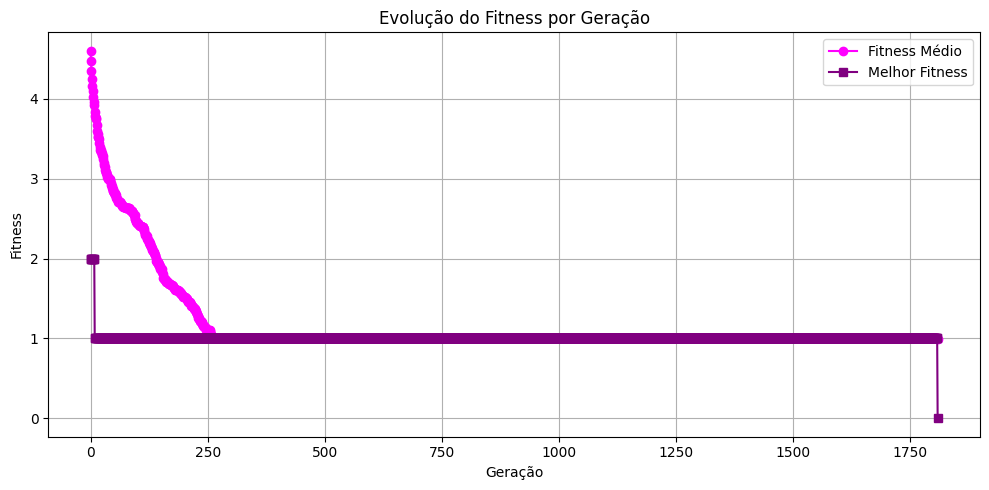


✅ Solução encontrada na geração 1
Solução: [6 4 2 8 5 7 1 3]
Fitness: 0
[4.84]


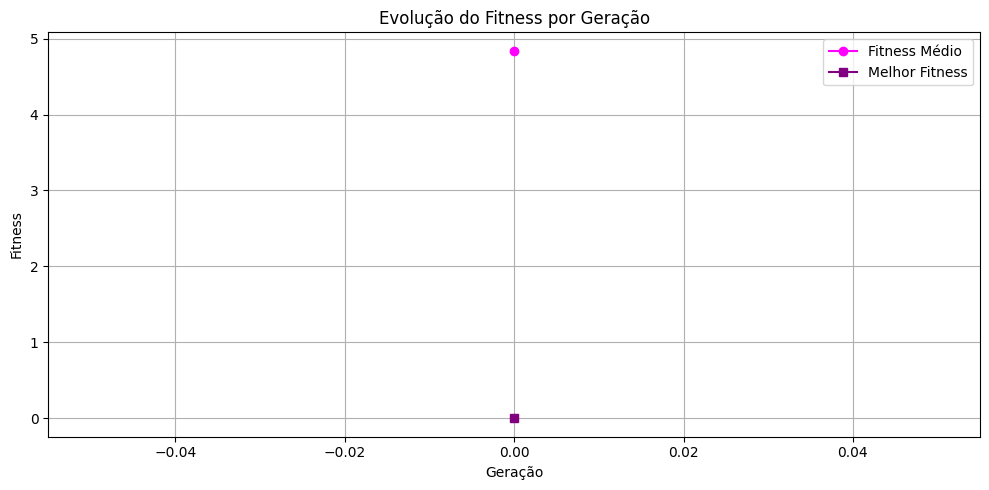


✅ Solução encontrada na geração 188
Solução: [5 1 8 6 3 7 2 4]
Fitness: 0
[5.1, 5.04, 4.92, 4.89, 4.8, 4.73, 4.72, 4.69, 4.61, 4.52, 4.44, 4.36, 4.31, 4.29, 4.24, 4.2, 4.18, 4.16, 4.09, 4.02, 3.99, 3.93, 3.86, 3.85, 3.79, 3.77, 3.76, 3.71, 3.7, 3.68, 3.67, 3.67, 3.61, 3.59, 3.57, 3.55, 3.51, 3.45, 3.41, 3.38, 3.37, 3.36, 3.32, 3.25, 3.23, 3.23, 3.21, 3.17, 3.15, 3.15, 3.15, 3.13, 3.12, 3.11, 3.11, 3.1, 3.1, 3.07, 3.07, 3.07, 3.05, 3.03, 3.01, 2.98, 2.93, 2.88, 2.86, 2.85, 2.85, 2.82, 2.82, 2.78, 2.74, 2.73, 2.72, 2.68, 2.68, 2.64, 2.64, 2.63, 2.62, 2.6, 2.59, 2.55, 2.53, 2.53, 2.53, 2.52, 2.52, 2.48, 2.43, 2.42, 2.4, 2.34, 2.34, 2.32, 2.31, 2.31, 2.29, 2.29, 2.27, 2.26, 2.25, 2.24, 2.24, 2.21, 2.21, 2.2, 2.2, 2.2, 2.2, 2.19, 2.19, 2.19, 2.18, 2.17, 2.16, 2.16, 2.15, 2.15, 2.15, 2.14, 2.11, 2.11, 2.07, 2.07, 2.07, 2.05, 2.04, 2.01, 1.98, 1.96, 1.95, 1.92, 1.92, 1.91, 1.9, 1.9, 1.9, 1.9, 1.89, 1.87, 1.87, 1.84, 1.82, 1.79, 1.79, 1.79, 1.76, 1.74, 1.73, 1.73, 1.73, 1.73, 1.73, 1.73, 1.73

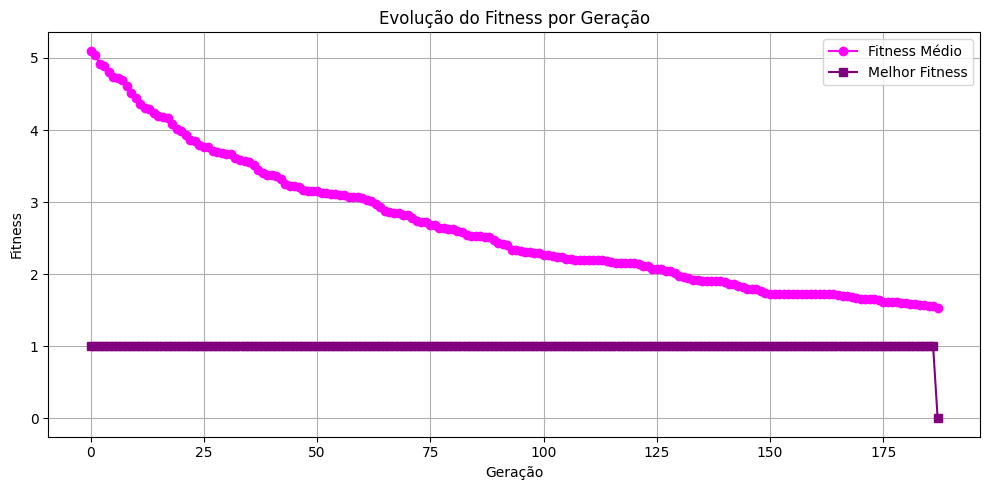


✅ Solução encontrada na geração 1
Solução: [5 7 2 6 3 1 4 8]
Fitness: 0
[4.64]


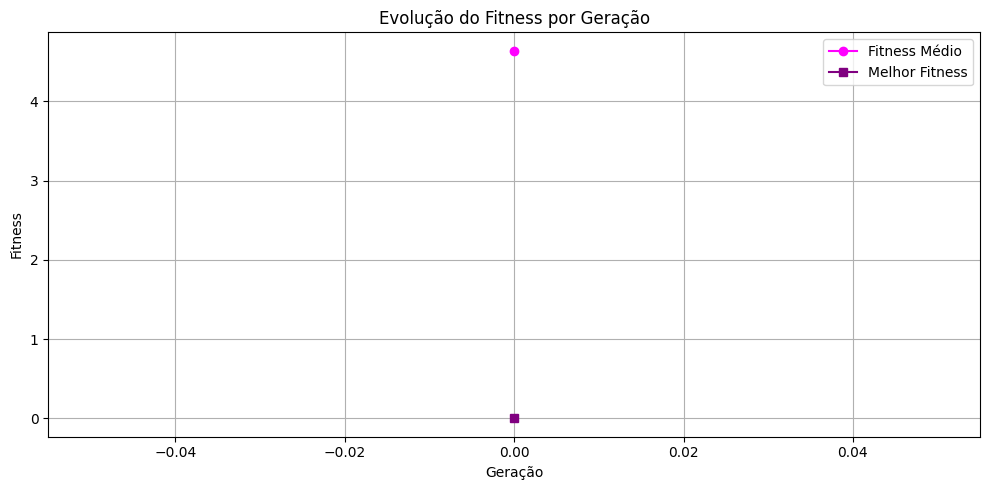


✅ Solução encontrada na geração 1
Solução: [4 1 5 8 6 3 7 2]
Fitness: 0
[4.5]


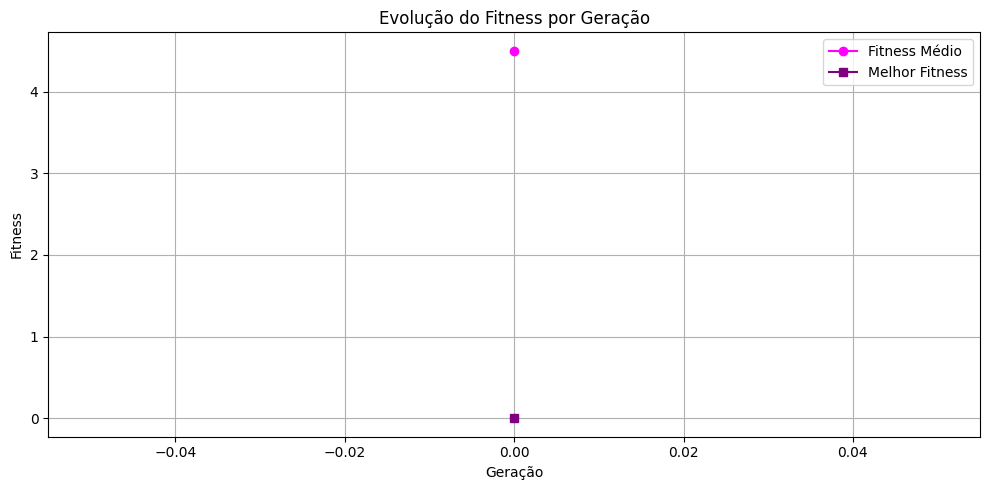


✅ Solução encontrada na geração 1
Solução: [5 7 2 6 3 1 4 8]
Fitness: 0
[4.73]


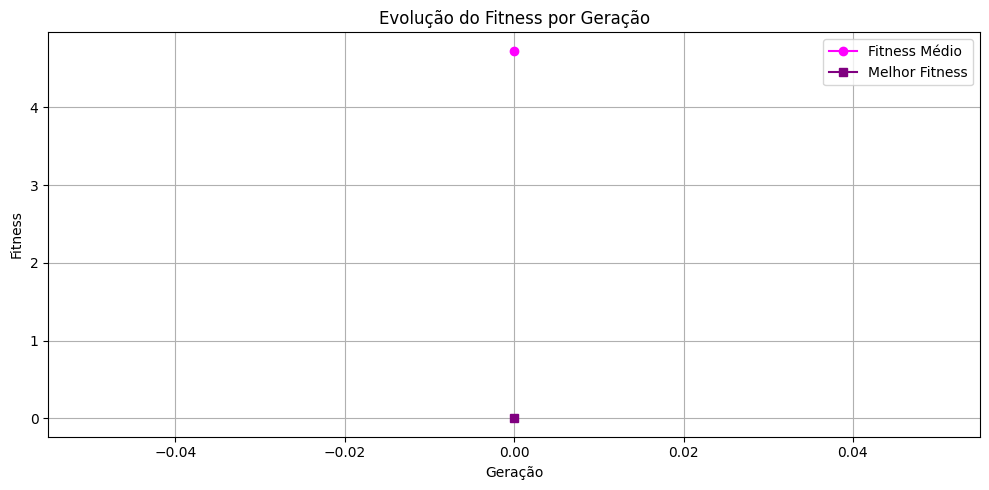


✅ Solução encontrada na geração 162
Solução: [4 6 1 5 2 8 3 7]
Fitness: 0
[4.72, 4.58, 4.44, 4.31, 4.22, 4.12, 4.01, 3.97, 3.92, 3.82, 3.77, 3.73, 3.69, 3.62, 3.61, 3.56, 3.49, 3.42, 3.4, 3.32, 3.28, 3.26, 3.26, 3.22, 3.16, 3.11, 3.06, 3.02, 2.96, 2.92, 2.87, 2.84, 2.77, 2.75, 2.72, 2.69, 2.68, 2.64, 2.62, 2.61, 2.58, 2.54, 2.52, 2.5, 2.45, 2.41, 2.36, 2.34, 2.34, 2.34, 2.34, 2.34, 2.34, 2.34, 2.34, 2.34, 2.32, 2.31, 2.29, 2.29, 2.29, 2.29, 2.29, 2.28, 2.28, 2.26, 2.26, 2.26, 2.24, 2.22, 2.21, 2.19, 2.17, 2.17, 2.16, 2.16, 2.15, 2.15, 2.14, 2.14, 2.11, 2.08, 2.05, 2.03, 2.03, 2.03, 2.02, 2.0, 1.99, 1.95, 1.92, 1.9, 1.89, 1.87, 1.84, 1.82, 1.79, 1.77, 1.73, 1.73, 1.72, 1.7, 1.7, 1.69, 1.69, 1.69, 1.69, 1.69, 1.69, 1.69, 1.69, 1.69, 1.69, 1.69, 1.68, 1.68, 1.68, 1.68, 1.67, 1.67, 1.66, 1.66, 1.66, 1.65, 1.64, 1.64, 1.64, 1.62, 1.62, 1.62, 1.62, 1.6, 1.59, 1.57, 1.55, 1.55, 1.54, 1.52, 1.52, 1.52, 1.52, 1.52, 1.51, 1.51, 1.51, 1.5, 1.49, 1.47, 1.47, 1.47, 1.45, 1.44, 1.44, 1.42, 1.42, 1.

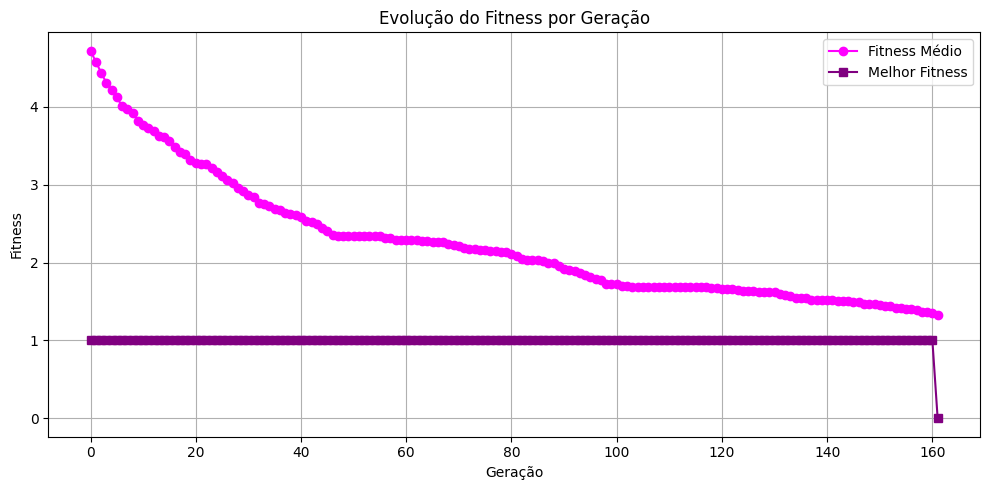


✅ Solução encontrada na geração 157
Solução: [3 6 2 7 1 4 8 5]
Fitness: 0
[5.16, 5.01, 4.86, 4.73, 4.71, 4.61, 4.53, 4.51, 4.46, 4.44, 4.39, 4.31, 4.26, 4.24, 4.17, 4.11, 4.05, 4.01, 3.96, 3.95, 3.9, 3.83, 3.76, 3.67, 3.62, 3.58, 3.55, 3.5, 3.45, 3.4, 3.36, 3.29, 3.23, 3.21, 3.14, 3.1, 3.1, 3.08, 3.06, 3.06, 3.03, 3.01, 2.95, 2.91, 2.87, 2.84, 2.81, 2.8, 2.76, 2.73, 2.68, 2.66, 2.64, 2.64, 2.58, 2.55, 2.53, 2.53, 2.53, 2.52, 2.51, 2.51, 2.49, 2.47, 2.42, 2.41, 2.41, 2.39, 2.36, 2.35, 2.35, 2.33, 2.32, 2.32, 2.32, 2.32, 2.31, 2.3, 2.3, 2.3, 2.3, 2.28, 2.28, 2.27, 2.25, 2.21, 2.2, 2.2, 2.2, 2.19, 2.19, 2.19, 2.19, 2.17, 2.17, 2.15, 2.13, 2.13, 2.13, 2.13, 2.13, 2.11, 2.07, 2.07, 2.05, 2.05, 2.05, 2.04, 2.04, 2.03, 2.03, 2.01, 2.0, 1.98, 1.97, 1.94, 1.92, 1.91, 1.89, 1.87, 1.84, 1.82, 1.8, 1.8, 1.8, 1.79, 1.78, 1.78, 1.78, 1.77, 1.77, 1.73, 1.73, 1.73, 1.73, 1.7, 1.7, 1.7, 1.69, 1.67, 1.66, 1.66, 1.64, 1.63, 1.62, 1.62, 1.62, 1.62, 1.62, 1.61, 1.6, 1.6, 1.6, 1.6, 1.6, 1.59, 1.57]


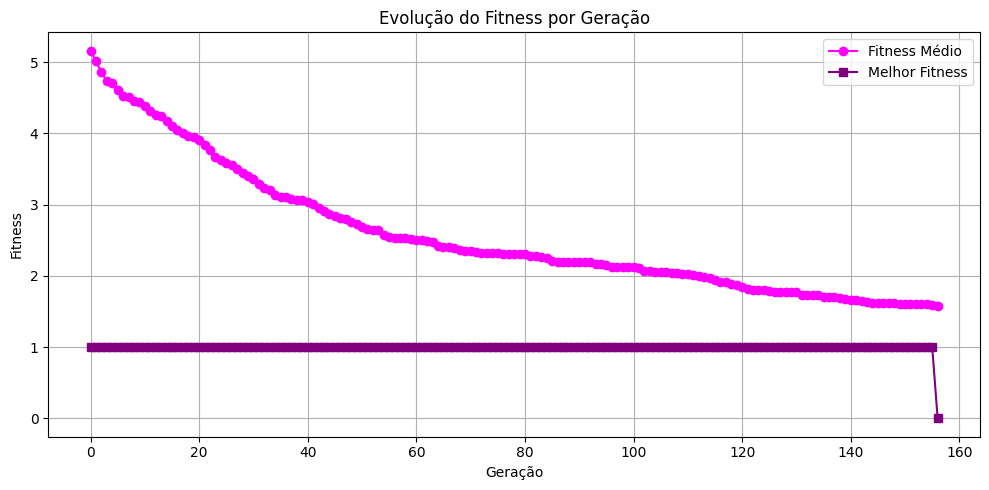


✅ Solução encontrada na geração 1
Solução: [4 6 1 5 2 8 3 7]
Fitness: 0
[4.83]


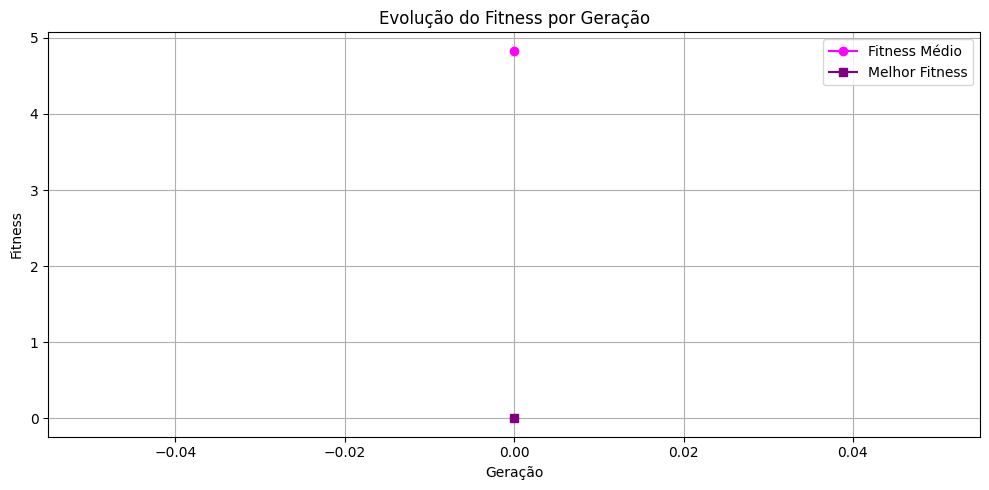


✅ Solução encontrada na geração 101
Solução: [1 6 8 3 7 4 2 5]
Fitness: 0
[4.34, 4.26, 4.15, 4.12, 4.05, 3.96, 3.92, 3.87, 3.82, 3.77, 3.74, 3.67, 3.61, 3.56, 3.54, 3.54, 3.5, 3.48, 3.46, 3.45, 3.39, 3.39, 3.34, 3.29, 3.26, 3.21, 3.19, 3.16, 3.14, 3.12, 3.07, 3.04, 3.0, 2.98, 2.97, 2.95, 2.95, 2.95, 2.94, 2.92, 2.89, 2.89, 2.88, 2.85, 2.83, 2.82, 2.79, 2.76, 2.76, 2.76, 2.73, 2.72, 2.7, 2.69, 2.69, 2.68, 2.68, 2.65, 2.65, 2.64, 2.59, 2.56, 2.55, 2.53, 2.51, 2.51, 2.51, 2.51, 2.51, 2.5, 2.49, 2.47, 2.47, 2.47, 2.47, 2.43, 2.41, 2.41, 2.39, 2.38, 2.36, 2.36, 2.36, 2.36, 2.35, 2.35, 2.33, 2.32, 2.32, 2.3, 2.26, 2.25, 2.23, 2.21, 2.2, 2.18, 2.18, 2.17, 2.15, 2.14, 2.11]


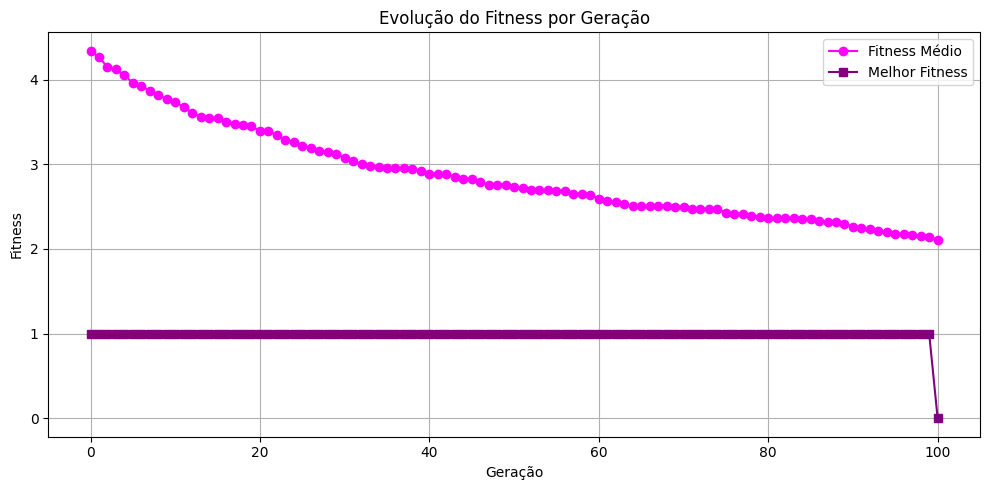


✅ Solução encontrada na geração 5
Solução: [4 6 8 3 1 7 5 2]
Fitness: 0
[4.86, 4.76, 4.68, 4.59, 4.47]


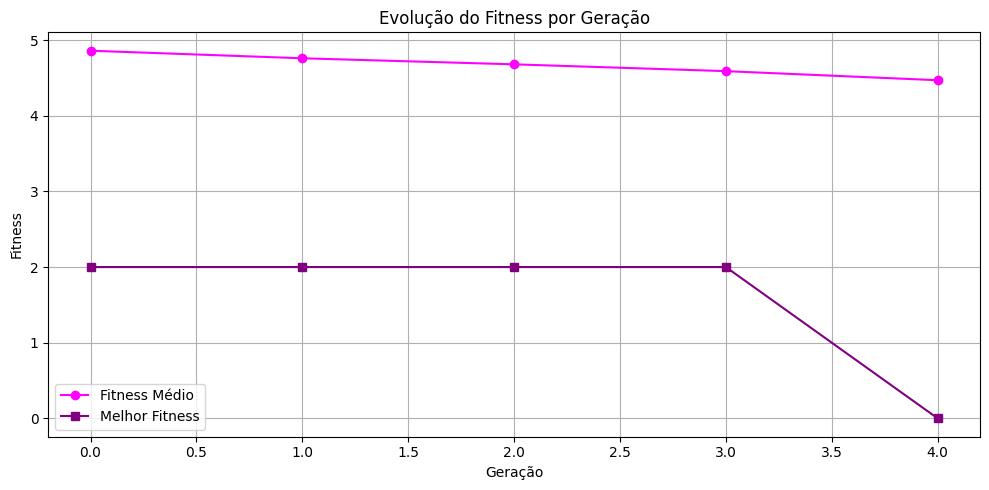


✅ Solução encontrada na geração 1
Solução: [6 2 7 1 3 5 8 4]
Fitness: 0
[4.52]


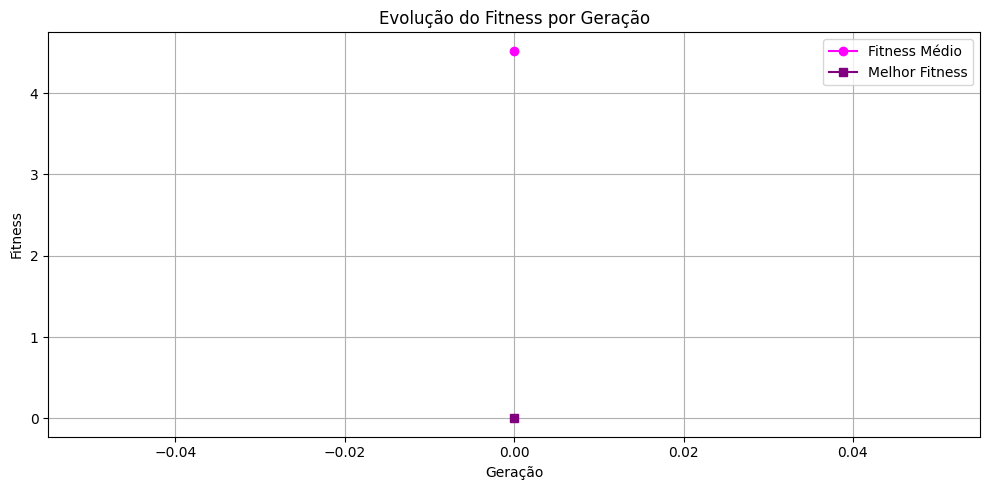


✅ Solução encontrada na geração 128
Solução: [4 8 1 3 6 2 7 5]
Fitness: 0
[4.53, 4.4, 4.29, 4.19, 4.17, 4.15, 4.09, 4.0, 3.93, 3.9, 3.86, 3.81, 3.75, 3.71, 3.69, 3.66, 3.6, 3.54, 3.46, 3.42, 3.38, 3.37, 3.32, 3.3, 3.27, 3.24, 3.19, 3.15, 3.1, 3.08, 3.04, 2.99, 2.98, 2.95, 2.95, 2.94, 2.93, 2.88, 2.85, 2.82, 2.82, 2.79, 2.75, 2.72, 2.72, 2.71, 2.67, 2.64, 2.6, 2.55, 2.51, 2.47, 2.47, 2.46, 2.4, 2.39, 2.36, 2.35, 2.35, 2.32, 2.32, 2.32, 2.32, 2.32, 2.31, 2.3, 2.3, 2.29, 2.29, 2.28, 2.26, 2.26, 2.25, 2.23, 2.23, 2.2, 2.18, 2.18, 2.15, 2.14, 2.12, 2.08, 2.04, 2.0, 2.0, 1.98, 1.98, 1.97, 1.96, 1.95, 1.93, 1.89, 1.88, 1.84, 1.8, 1.76, 1.72, 1.69, 1.68, 1.66, 1.66, 1.65, 1.63, 1.63, 1.61, 1.6, 1.59, 1.55, 1.55, 1.53, 1.51, 1.51, 1.49, 1.49, 1.48, 1.48, 1.48, 1.47, 1.47, 1.47, 1.47, 1.46, 1.45, 1.45, 1.45, 1.45, 1.45, 1.43]


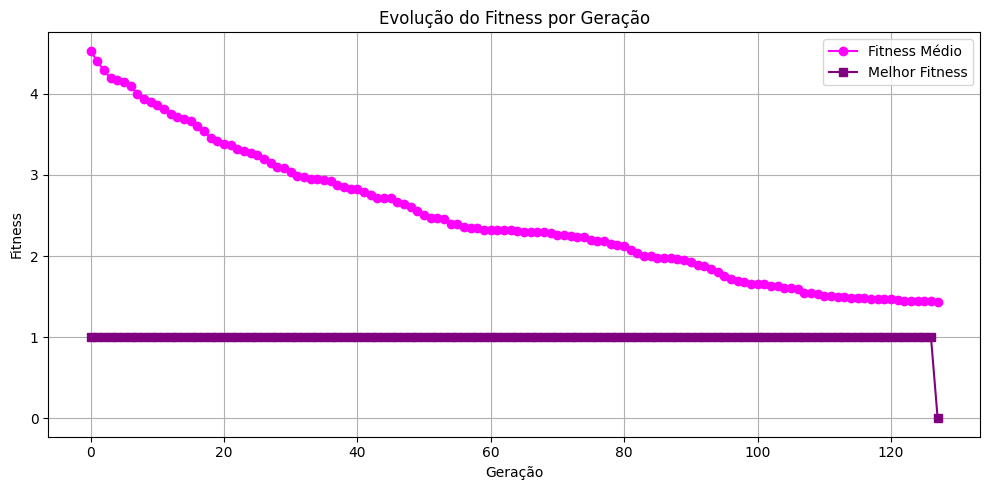


✅ Solução encontrada na geração 1
Solução: [6 4 2 8 5 7 1 3]
Fitness: 0
[4.7]


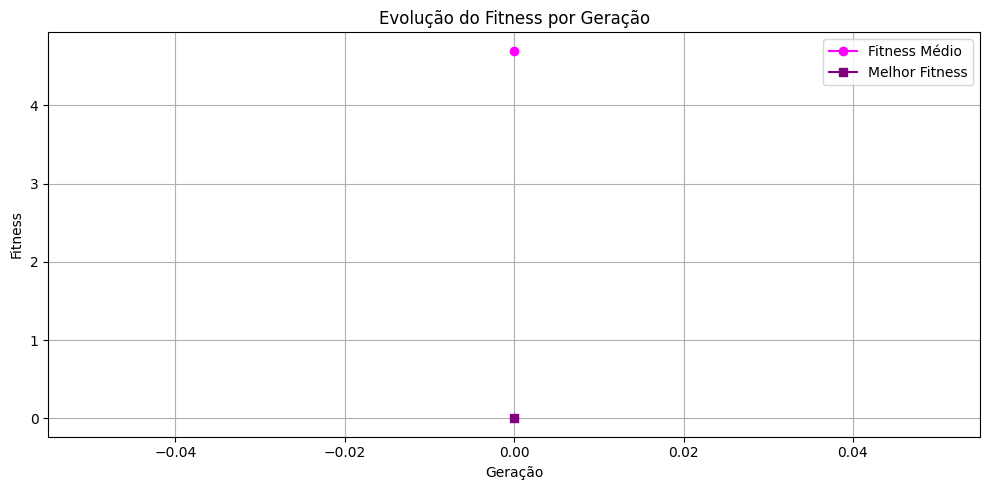


✅ Solução encontrada na geração 11
Solução: [2 7 5 8 1 4 6 3]
Fitness: 0
[4.93, 4.78, 4.64, 4.55, 4.47, 4.38, 4.31, 4.28, 4.23, 4.17, 4.07]


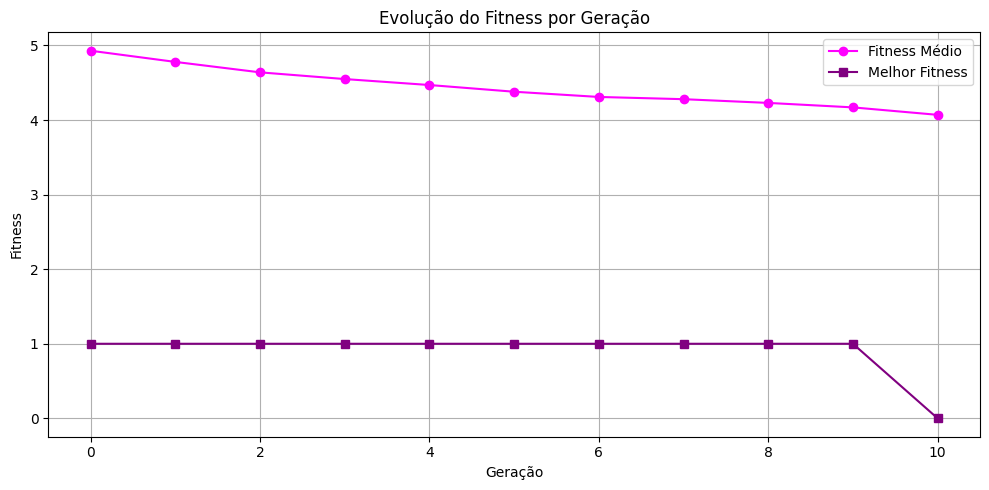


✅ Solução encontrada na geração 93
Solução: [1 7 4 6 8 2 5 3]
Fitness: 0
[4.52, 4.37, 4.28, 4.24, 4.19, 4.09, 4.01, 3.9, 3.86, 3.82, 3.78, 3.77, 3.72, 3.65, 3.62, 3.57, 3.55, 3.51, 3.43, 3.43, 3.41, 3.37, 3.37, 3.35, 3.32, 3.26, 3.23, 3.22, 3.17, 3.13, 3.09, 3.08, 3.03, 3.03, 3.01, 2.99, 2.99, 2.98, 2.97, 2.94, 2.91, 2.9, 2.9, 2.89, 2.89, 2.86, 2.85, 2.85, 2.84, 2.83, 2.81, 2.79, 2.79, 2.77, 2.72, 2.72, 2.71, 2.7, 2.66, 2.62, 2.62, 2.6, 2.57, 2.55, 2.52, 2.48, 2.47, 2.45, 2.45, 2.43, 2.41, 2.41, 2.39, 2.37, 2.36, 2.34, 2.34, 2.34, 2.34, 2.33, 2.33, 2.32, 2.32, 2.28, 2.24, 2.2, 2.2, 2.18, 2.16, 2.16, 2.15, 2.14, 2.09]


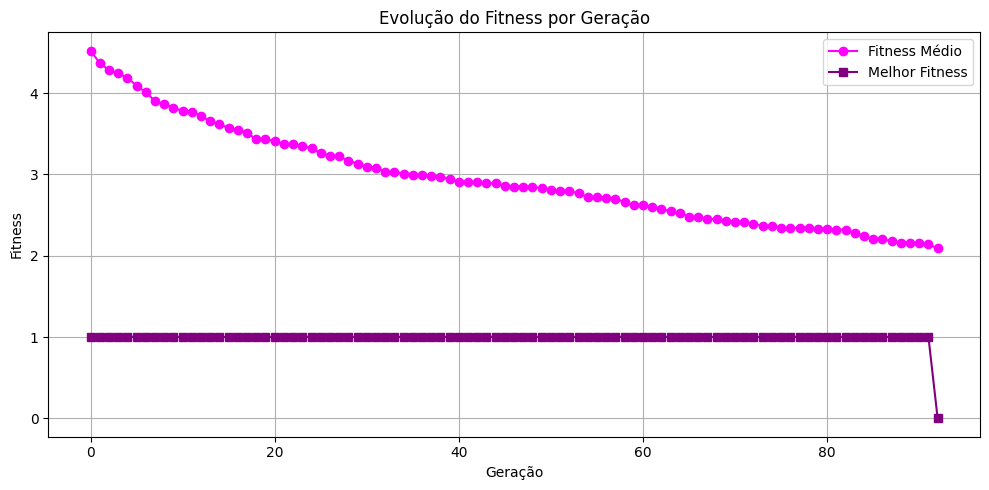


Média: 119.63333333333334
Mediana: 41.5
Moda: 1
Desvio padrão: 325.6694413933725
Variância: 106060.58505747127
Amplitude: 1808
Valor mínimo: 1
Valor máximo: 1809
Q1: 1.0, Q3: 115.5
Coeficiente de variação: 2.7222299364171563


In [260]:
numSimulacoes = 30
simulacoes(numSimulacoes)